# Preparation

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AI・データサイエンス実践プログラム/機械学習1/diabetes_train.csv', index_col = 0)
df.head(3)

,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,,,,,,,,,,
0.012648,0.050680,0.000261,-0.011409,0.039710,0.057245,-0.039719,0.056081,0.024053,0.032059,259.0
-0.027310,-0.044642,-0.066563,-0.112400,-0.049727,-0.041397,0.000779,-0.039493,-0.035817,-0.009362,77.0
0.005383,-0.044642,0.059541,-0.056166,0.024574,0.052861,-0.043401,0.050914,-0.004220,-0.030072,91.0


In [4]:
t = df['target'].values
x = df.drop(labels = ['target'], axis = 1).values

In [5]:
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size = 0.2, random_state = 0)

In [6]:
# 重回帰分析モデルの学習
model = LinearRegression()
model.fit(x_train, t_train)

LinearRegression()

In [7]:
print('train score : ', model.score(x_train, t_train))
print('test score : ', model.score(x_test, t_test))

train score :  0.5560252328259832
test score :  0.5152090010260844


In [9]:
# Ridge回帰　正則化
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1)

In [10]:
ridge.fit(x_train, t_train)

Ridge(alpha=1)

In [11]:
# モデルの検証
print('train score : ', ridge.score(x_train, t_train))
print('test score : ', ridge.score(x_test, t_test))

train score :  0.4186290402734766
test score :  0.5045494215876487


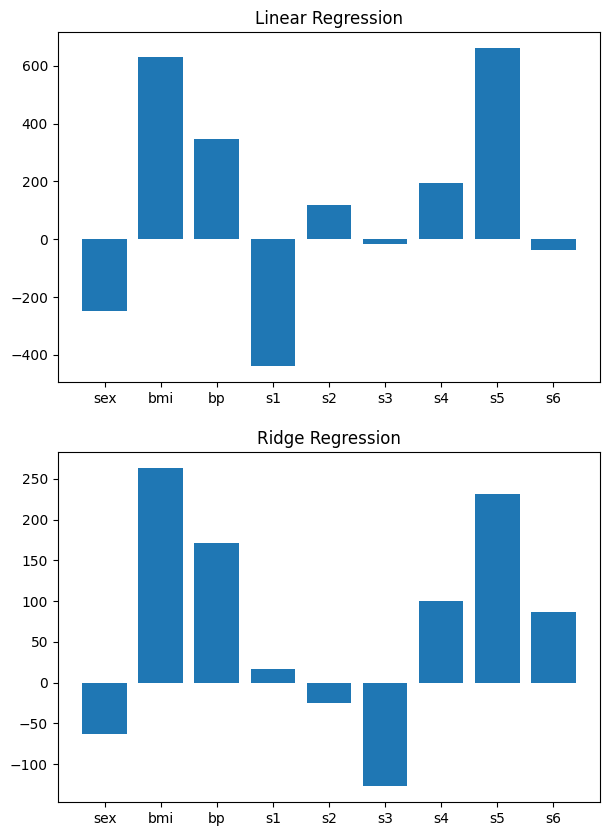

In [12]:
# 箱を準備
fig = plt.figure(figsize=(7, 10))

# 重回帰分析の重みを棒グラフで表示
columns = df.columns.tolist()[:-1]
ax1 = fig.add_subplot(2, 1, 1)
ax1.bar(x=columns, height=model.coef_)
ax1.set_title('Linear Regression')

# リッジ回帰の重みを棒グラフで表示
ax2 = fig.add_subplot(2, 1, 2)
ax2.bar(x=columns, height=ridge.coef_)
ax2.set_title('Ridge Regression');

In [13]:
# モデルの定義
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1)

In [14]:
# モデルの学習
lasso.fit(x_train, t_train)

Lasso(alpha=1)

In [15]:
# モデルの検証
print('train score : ', lasso.score(x_train, t_train))
print('test score : ', lasso.score(x_test, t_test))

train score :  0.3977276258039153
test score :  0.4616647578819647


In [16]:
# 0 になっている特徴量の数
print('元の特徴量の数 : ', x.shape[1])
print('Lasso の特徴量 : ', np.sum(lasso.coef_ == 0))

元の特徴量の数 :  9
Lasso の特徴量 :  7


In [17]:
# アルファを変更
lasso_01 = Lasso(alpha=0.1)
lasso_01.fit(x_train, t_train)

print('train score : ', lasso_01.score(x_train, t_train))
print('test score : ', lasso_01.score(x_test, t_test))

train score :  0.5493428015815016
test score :  0.5409012141548553


In [18]:
# 0 になっている特徴量の数
print('元の特徴量の数 : ', x.shape[1])
print('Lasso01 の特徴量 : ', np.sum(lasso_01.coef_ == 0))

元の特徴量の数 :  9
Lasso01 の特徴量 :  3


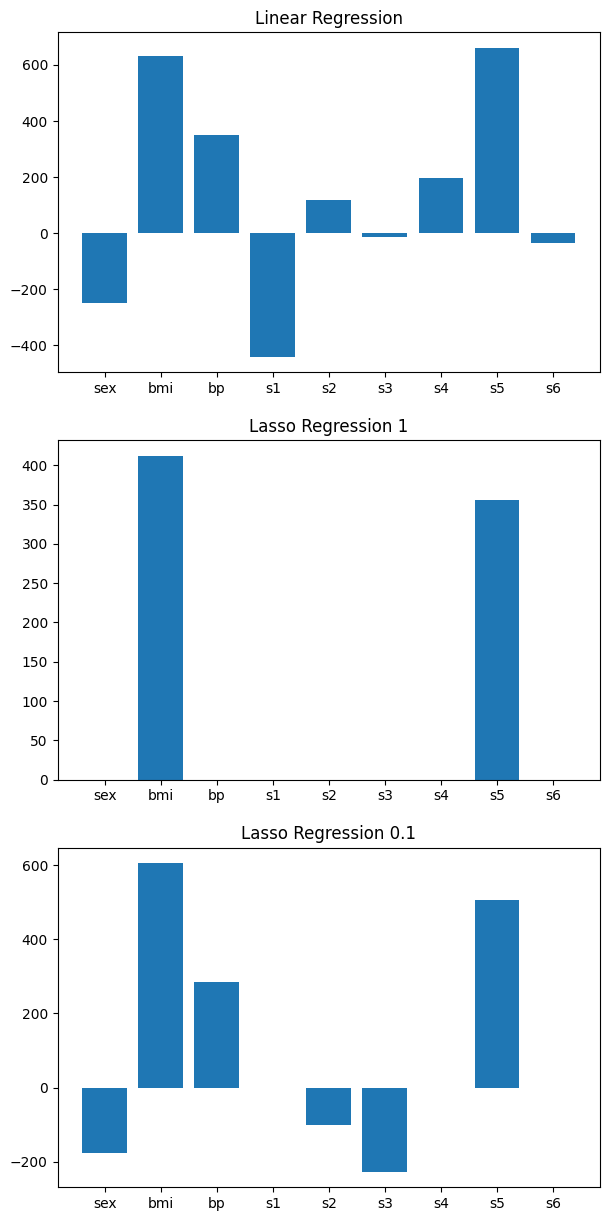

In [19]:
fig = plt.figure(figsize=(7, 15))

# 重回帰分析の重みを棒グラフで表示
ax1 = fig.add_subplot(3, 1, 1)
ax1.bar(x=columns, height=model.coef_)
ax1.set_title('Linear Regression')

# lassoの重みを棒グラフで表示
ax2 = fig.add_subplot(3, 1, 2)
ax2.bar(x=columns, height=lasso.coef_)
ax2.set_title('Lasso Regression 1')

# lasso_01の重みを棒グラフで表示
ax3 = fig.add_subplot(3, 1, 3)
ax3.bar(x=columns, height=lasso_01.coef_)
ax3.set_title('Lasso Regression 0.1');

# 多重線形性

In [21]:
# データの確認
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AI・データサイエンス実践プログラム/機械学習1/regression_pls.csv')
df.head(3)

,Target,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x187,x188,x189,x190,x191,x192,x193,x194,x195,x196
0,1.58,59.068,54.028,59.037114,24,0,0.213790,-0.369921,0.369921,0.213790,...,0,0,0,0,0,0,0,0,0,0
1,1.34,46.073,40.025,46.053098,20,0,-0.001725,-0.271722,0.271722,0.001725,...,0,0,0,0,0,0,0,0,0,0
2,1.22,60.052,56.020,60.021129,24,0,0.299685,-0.481433,0.481433,0.299685,...,0,0,0,0,0,0,0,0,0,0


In [22]:
df.shape

(1290, 197)

In [23]:
# データの切り分け -> ndarray に変換
x = df.drop('Target', axis=1).values
t = df['Target'].values

print(x.shape, t.shape)

(1290, 196) (1290,)


In [24]:
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.3, random_state=0)

In [25]:
# 相関係数の算出
df_corr = df.corr()
df_corr.head()

,Target,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x187,x188,x189,x190,x191,x192,x193,x194,x195,x196
Target,1.000000,-0.642326,-0.648078,-0.640489,-0.524453,NaN,0.111829,-0.360696,0.357026,0.113189,...,-0.032287,-0.015204,0.019244,-0.047169,NaN,0.007788,NaN,0.002448,-0.113820,0.043600
x1,-0.642326,1.000000,0.997571,0.999978,0.908895,NaN,0.322508,-0.117193,0.134074,0.298204,...,0.051291,0.186110,0.027947,-0.002219,NaN,0.001304,NaN,-0.015226,-0.038657,0.027857
x2,-0.648078,0.997571,1.000000,0.997252,0.883891,NaN,0.322631,-0.097297,0.115794,0.294947,...,0.047416,0.191792,0.029659,-0.007914,NaN,0.005912,NaN,-0.015106,-0.062823,0.027773
x3,-0.640489,0.999978,0.997252,1.000000,0.910855,NaN,0.324352,-0.120477,0.137237,0.300415,...,0.051542,0.186772,0.028046,-0.002001,NaN,0.001447,NaN,-0.015093,-0.038138,0.028359
x4,-0.524453,0.908895,0.883891,0.910855,1.000000,NaN,0.385792,-0.284647,0.293981,0.382603,...,0.044125,0.174983,0.022996,0.018780,NaN,-0.010834,NaN,-0.016378,0.027813,0.055553


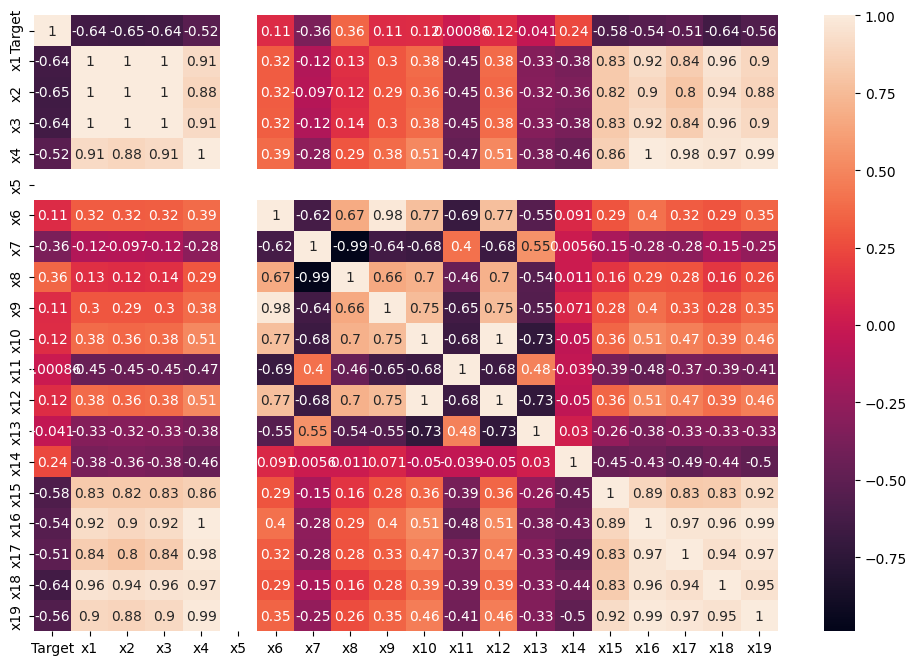

In [26]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_corr.iloc[:20, :20], annot=True);

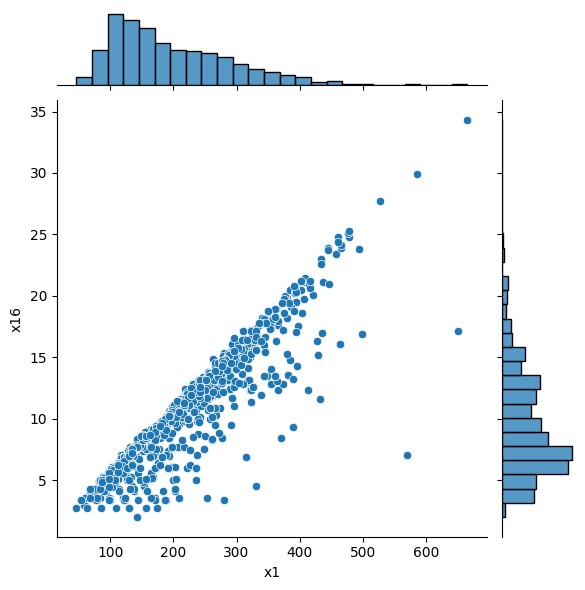

In [27]:
sns.jointplot(x='x1', y='x16', data=df);

In [28]:
# モデルの定義
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [30]:
# モデルの学習
model.fit(x_train, t_train)

LinearRegression()

In [31]:
# モデルの検証
print('train : ', model.score(x_train, t_train))
print('test : ', model.score(x_test, t_test))

train :  0.9365473244865767
test :  0.006164361245877936


In [32]:
# モデルの定義（ n_components:7 とする）
from sklearn.cross_decomposition import PLSRegression
pls = PLSRegression(n_components=7)

In [33]:
# モデルの学習
pls.fit(x_train, t_train)

PLSRegression(n_components=7)

In [34]:
# モデルの検証
print('train score : ', pls.score(x_train, t_train))
print('test score : ', pls.score(x_test, t_test))

train score :  0.906376310202351
test score :  0.7387281471807322


# Assighment

In [35]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AI・データサイエンス実践プログラム/機械学習1/diabetes_train.csv')

In [39]:
df_corr = df.corr()
df_corr.shape

(11, 11)

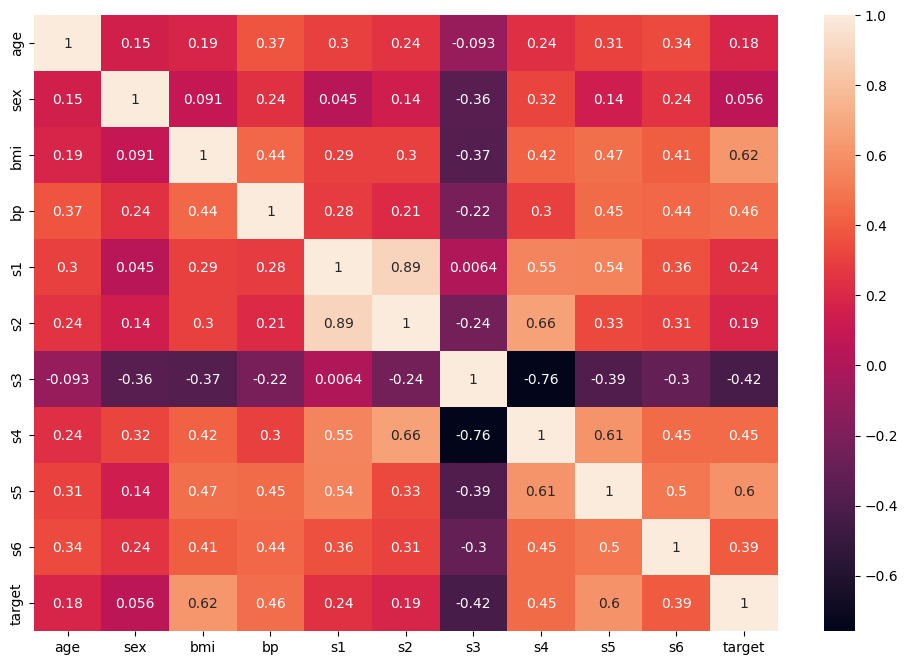

In [40]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_corr.iloc[:11, :11], annot=True);